In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D, BatchNormalization
from keras import regularizers, optimizers
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers


plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [2]:
# List of folders
train_path = "images/train"
print(os.listdir(train_path))
print("*"*100)
test_path = "images/val"
print(os.listdir(test_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
****************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


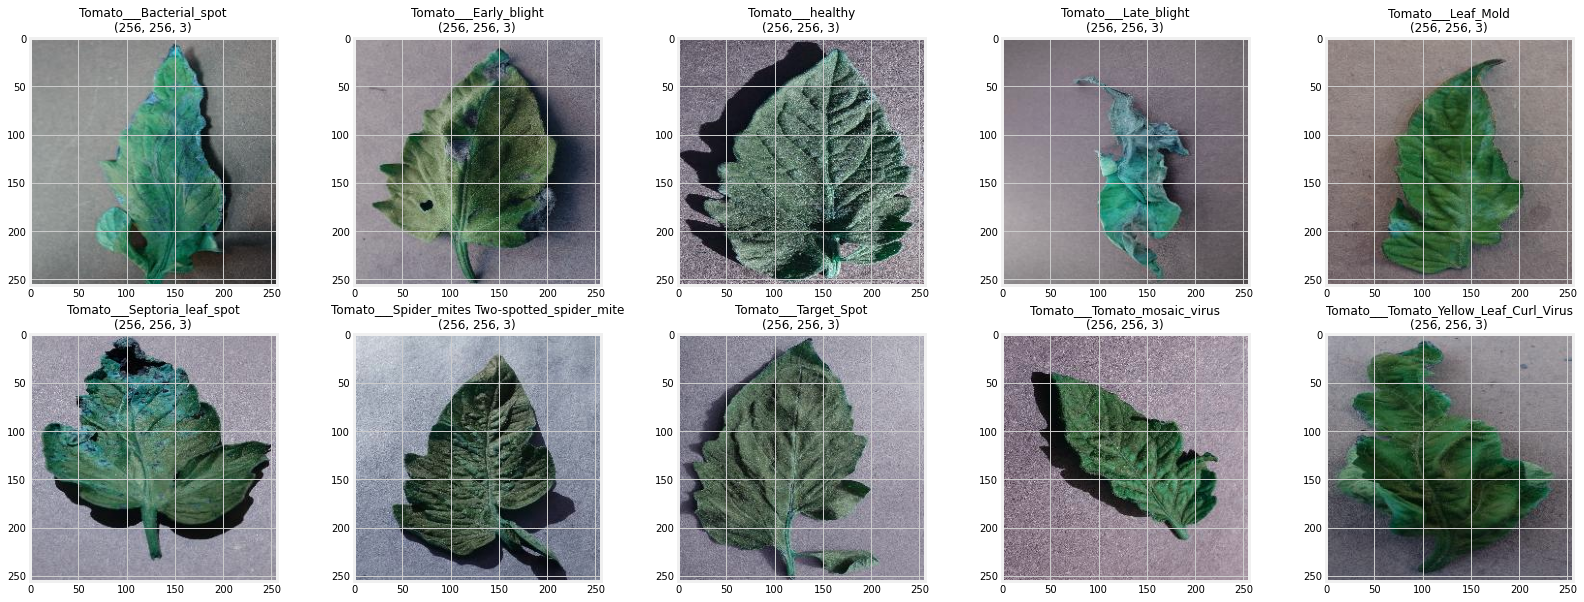

In [3]:
# Display of an image per folder
classes = os.listdir(train_path)

plt.figure(figsize=(25,10))

for i in enumerate(classes):
    pic = os.listdir(train_path+"/"+i[1])[3]
    image = cv2.imread(train_path+"/"+i[1]+"/"+pic)
    plt.subplot(2,5,i[0]+1)
    plt.imshow(image)
    plt.title(f"{i[1]}\n{image.shape}", fontsize=12)

In [4]:
# Preprocessing images
IMG_SIZE = (128, 128)
BATCH_SIZE = 16
SEED = 42

datagen = ImageDataGenerator(rescale = 1./255,
                             validation_split = 0.2)

train_df = datagen.flow_from_directory(train_path,
                                       target_size = IMG_SIZE,
                                       class_mode = "categorical",
                                       batch_size = BATCH_SIZE,
                                       shuffle = True,
                                       subset = "training",
                                       seed = SEED)

val_df = datagen.flow_from_directory(train_path,
                                       target_size = IMG_SIZE,
                                       class_mode = "categorical",
                                       batch_size = BATCH_SIZE,
                                       shuffle = True,
                                       subset = "validation",
                                       seed = SEED)

datagen2 = ImageDataGenerator(rescale = 1./255)
test_df = datagen.flow_from_directory(test_path,
                                       target_size = IMG_SIZE,
                                       class_mode = "categorical",
                                       batch_size = BATCH_SIZE,
                                       shuffle = False)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


In [5]:
# Checking labels and quality
images, labels = next(iter(train_df))
print('Batch shape: ', images.shape)
print('Label shape: ', labels.shape)

Batch shape:  (16, 128, 128, 3)
Label shape:  (16, 10)


Label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


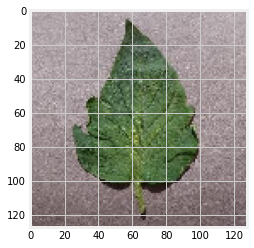

In [6]:
plt.imshow(images[8])
print('Label: ', labels[8])

In [7]:
 model = Sequential([
    Conv2D(128, (3, 3), padding="same",input_shape=(IMG_SIZE[0], IMG_SIZE[1],3)),
    MaxPooling2D(pool_size=2),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax', name='output_layers')
 ])
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 16)        18448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [9]:
epochs = 10
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history = model.fit(train_df, epochs=epochs, validation_data=(val_df))

Epoch 1/10
500/500 [==============================] - 407s 811ms/step - loss: 1.9956 - accuracy: 0.2455 - val_loss: 1.6109 - val_accuracy: 0.4125
Epoch 2/10
500/500 [==============================] - 390s 780ms/step - loss: 1.4589 - accuracy: 0.4689 - val_loss: 1.3547 - val_accuracy: 0.4895
Epoch 3/10
500/500 [==============================] - 373s 745ms/step - loss: 1.2506 - accuracy: 0.5470 - val_loss: 1.1663 - val_accuracy: 0.5910
Epoch 4/10
500/500 [==============================] - 374s 749ms/step - loss: 1.0899 - accuracy: 0.6156 - val_loss: 1.0849 - val_accuracy: 0.6095
Epoch 5/10
500/500 [==============================] - 374s 748ms/step - loss: 0.9952 - accuracy: 0.6404 - val_loss: 0.9062 - val_accuracy: 0.6945
Epoch 6/10
500/500 [==============================] - 374s 748ms/step - loss: 0.8713 - accuracy: 0.6905 - val_loss: 0.8778 - val_accuracy: 0.7035
Epoch 7/10
500/500 [==============================] - 375s 751ms/step - loss: 0.8103 - accuracy: 0.7122 - val_loss: 0.8625 -

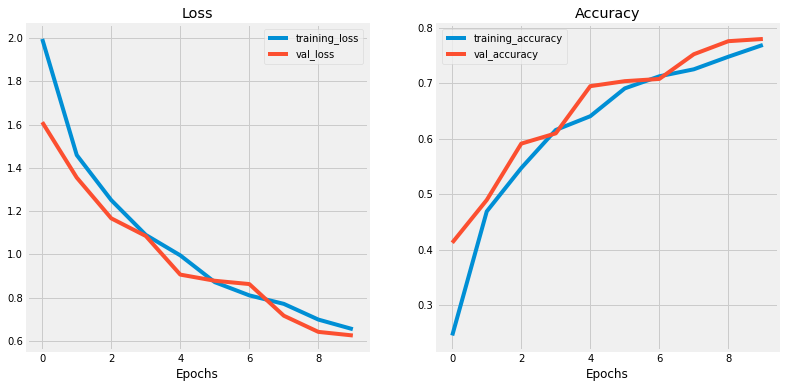

In [10]:
# Plot loss and accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

plt.figure(figsize=(12,6))
# Plot loss
plt.subplot(1,2,1)
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1,2,2)
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [20]:
# Test score
score = model.evaluate(test_df)
score

62/62 [==============================] - 20s 320ms/step - loss: 0.5944 - accuracy: 0.7886


[0.5944435596466064, 0.7886179089546204]

In [17]:
# Model backup
model.save('webapp/model/model_nolf.h5')

1/1 [==============================] - 0s 31ms/step


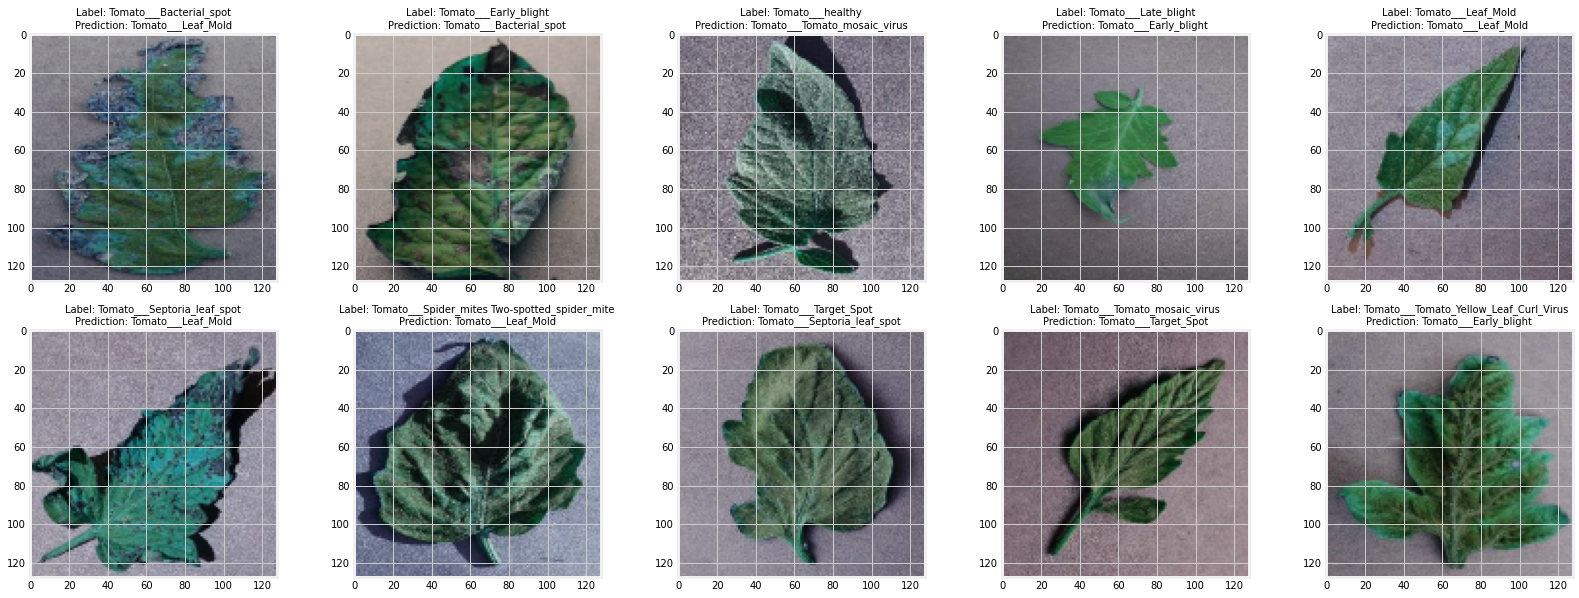

In [13]:
# Prediction and visualizations

classes = os.listdir(test_path)

plt.figure(figsize=(25,10))

for i in enumerate(classes):
    pic = os.listdir(test_path+"/"+i[1])[np.random.randint(len(test_df)-1)]
    pic_path = test_path+"/"+i[1]+"/"+pic
    image = cv2.imread(pic_path)
    image = cv2.resize(image, IMG_SIZE)
    pred = np.argmax(model.predict(image.reshape(-1,IMG_SIZE[0], IMG_SIZE[1], 3)/255))
    for j in list(enumerate(list(test_df.class_indices.keys()))):
        if pred == j[0]:
            prediction =  j[1]
    plt.subplot(2,5,i[0]+1)
    plt.imshow(image)
    plt.title(f"Label: {i[1]}\nPrediction: {prediction}", fontsize=10)
plt.show()

In [14]:
import sklearn.metrics as metrics

y_pred_ohe = model.predict(test_df)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
y_true_labels = test_df.labels

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  # shape=(12, 12)

62/62 [==============================] - 11s 168ms/step


<IPython.core.display.Javascript object>

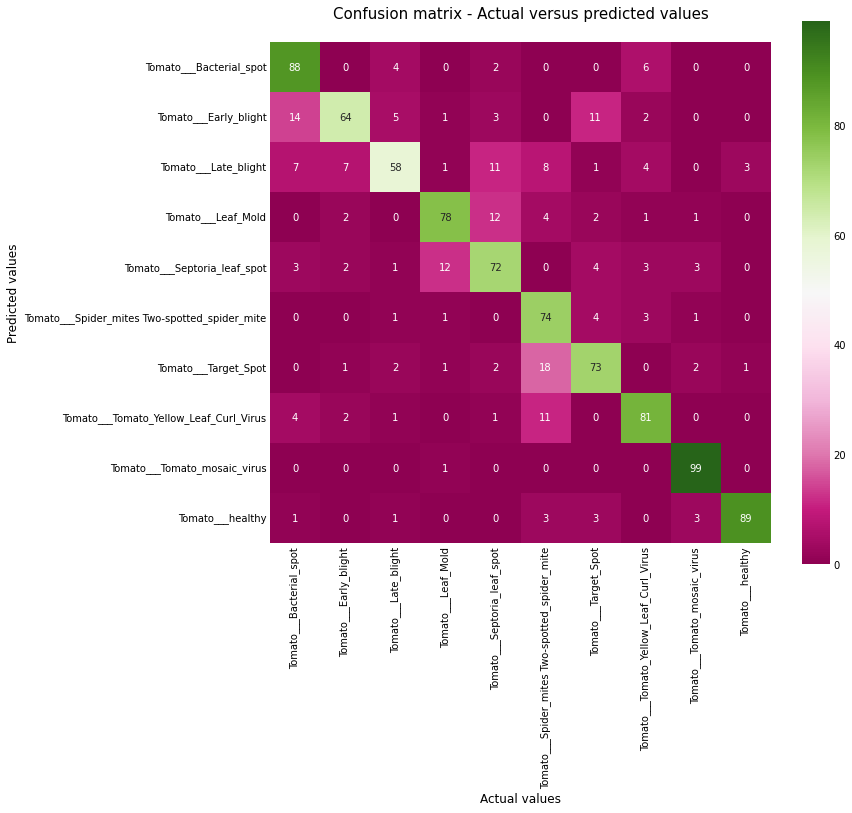

In [18]:
class_name = list(train_df.class_indices.keys())
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, cmap="PiYG", xticklabels=class_name, yticklabels=class_name, square=True)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Confusion matrix - Actual versus predicted values\n", fontsize=15)
plt.show();